In [3]:
# Install kaggle package
!pip install kaggle

# Upload kaggle.json (file API credentials)
from google.colab import files
files.upload()

# Setup folder kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Cek apakah kaggle sudah terhubung
!kaggle datasets list | head

# Download dataset IMDB
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Unzip ke folder data/raw
!mkdir -p data/raw
!unzip imdb-dataset-of-50k-movie-reviews.zip -d data/raw/

Saving kaggle.json to kaggle.json
ref                                                        title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
mosapabdelghany/medical-insurance-cost-dataset             Medical Insurance Cost Dataset                        16425  2025-08-24 11:54:36.533000           6222        124  1.0              
yashdevladdha/uber-ride-analytics-dashboard                Uber Data Analytics Dashboard                      17324552  2025-08-08 11:13:42.920000          50699       1119  1.0              
zadafiyabhrami/global-crocodile-species-dataset            Global Crocodile Species Dataset                      57473  2025-08-26 08:46:11.950000           4581        133  1.0              
codeby

In [4]:
import pandas as pd

# load dataset
df = pd.read_csv("data/raw/IMDB Dataset.csv")

# cek isi
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
!git clone https://github.com/itsaliasamosir03/Capstone-IMDB-Reviews-IBM-Granite.git

import pandas as pd
df = pd.read_csv("Capstone-IMDB-Reviews-IBM-Granite/data/raw/IMDB Dataset.csv")
print(df.shape)

Cloning into 'Capstone-IMDB-Reviews-IBM-Granite'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16 (delta 0), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 25.33 MiB | 10.95 MiB/s, done.
(50000, 2)


(50000, 2)
Missing values per kolom:
 review       0
sentiment    0
dtype: int64

Jumlah duplikat: 418


/tmp/ipython-input-3573713885.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="Set2")


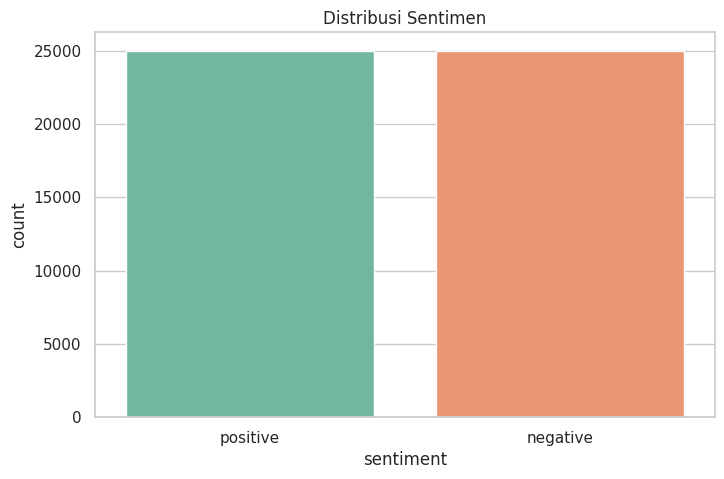

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


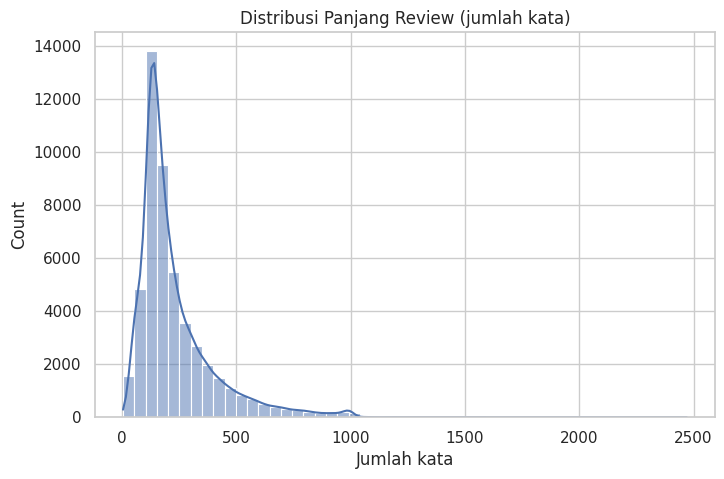

Rata-rata panjang review: 231.15694


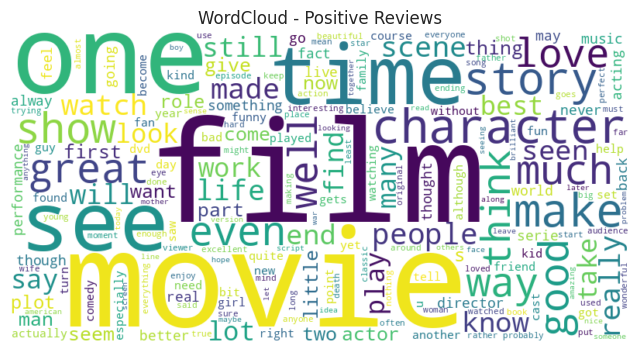

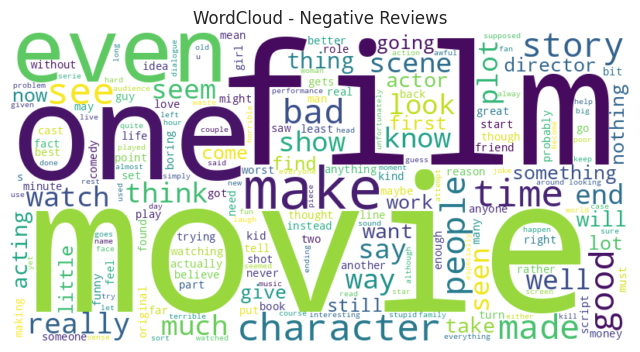

In [6]:
# 1. Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Buat Wordcloud
from wordcloud import WordCloud, STOPWORDS

# Setting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

# 2. Load Dataset
df = pd.read_csv("Capstone-IMDB-Reviews-IBM-Granite/data/raw/IMDB Dataset.csv")

print(df.shape)
df.head()

# 3. Cek Missing Values & Duplikat
print("Missing values per kolom:\n", df.isnull().sum())
print("\nJumlah duplikat:", df.duplicated().sum())

# 4. Distribusi Label (sentiment)
sns.countplot(x="sentiment", data=df, palette="Set2")
plt.title("Distribusi Sentimen")
plt.show()

print(df['sentiment'].value_counts())

# 5. Panjang Review (jumlah kata)
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribusi Panjang Review (jumlah kata)")
plt.xlabel("Jumlah kata")
plt.show()

print("Rata-rata panjang review:", df['review_length'].mean())

# 6. Bersihin Teks (basic cleaning)
def clean_text(text):
    text = re.sub(r"<.*?>", " ", text)      # hapus html tags
    text = re.sub(r"[^a-zA-Z']", " ", text) # hapus karakter non-huruf
    return text.lower()

df['clean_review'] = df['review'].apply(clean_text)
df[['review', 'clean_review']].head()

# 7. WordCloud (optional)
stopwords = set(STOPWORDS)

# Wordcloud untuk positive
text_pos = " ".join(df[df['sentiment']=='positive']['clean_review'])
wordcloud_pos = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(text_pos)

plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Reviews")
plt.show()

# Wordcloud untuk negative
text_neg = " ".join(df[df['sentiment']=='negative']['clean_review'])
wordcloud_neg = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(text_neg)

plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Negative Reviews")
plt.show()

In [7]:
# 1. Import Library
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 2. Load Dataset
df = pd.read_csv("Capstone-IMDB-Reviews-IBM-Granite/data/raw/IMDB Dataset.csv")
print("Shape awal:", df.shape)

# 3. Drop Duplicates
print("Jumlah duplikat sebelum:", df.duplicated().sum())
df = df.drop_duplicates()
print("Shape setelah drop duplikat:", df.shape)

# 4. Text Cleaning Function
def clean_text(text):
    # hapus html tags
    text = re.sub(r"<.*?>", " ", text)
    # hapus karakter non-alfabet
    text = re.sub(r"[^a-zA-Z']", " ", text)
    # lowercase
    text = text.lower()
    # hapus spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_review'] = df['review'].apply(clean_text)
df[['review', 'clean_review']].head()

# 5. Encode Label
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df[['sentiment', 'label']].head()

# 6. Train-Test Split
X = df['clean_review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

# 7. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Shape TF-IDF Train:", X_train_tfidf.shape)
print("Shape TF-IDF Test:", X_test_tfidf.shape)

Shape awal: (50000, 2)
Jumlah duplikat sebelum: 418
Shape setelah drop duplikat: (49582, 2)
Train size: 39665
Test size: 9917
Shape TF-IDF Train: (39665, 10000)
Shape TF-IDF Test: (9917, 10000)


=== Logistic Regression ===
Accuracy : 0.9011797922758898
Precision: 0.8905608755129959
Recall   : 0.9156118143459916
F1-score : 0.9029126213592233
ROC-AUC  : 0.9636912388078277
=== Random Forest ===
Accuracy : 0.8503579711606333
Precision: 0.8520459584761136
Recall   : 0.8493068113321278
F1-score : 0.850674179915476
ROC-AUC  : 0.9251124199658509


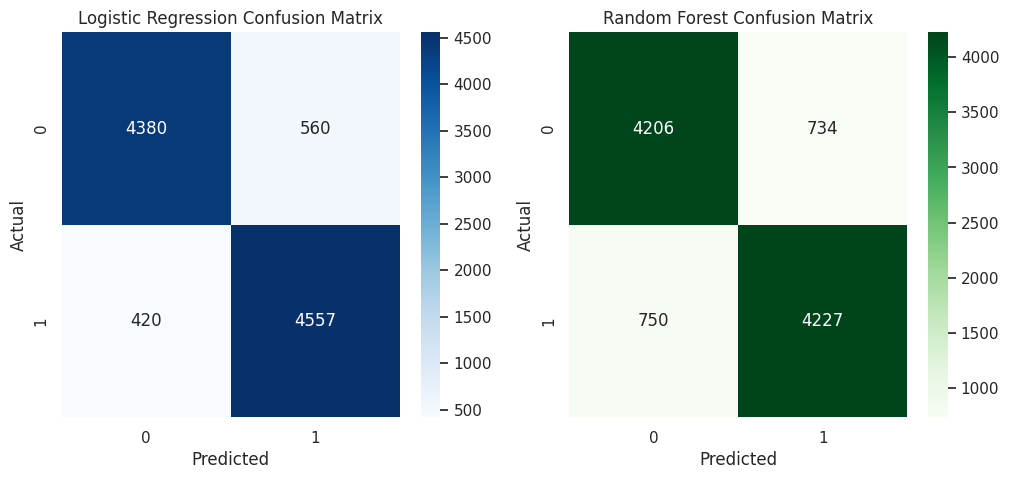

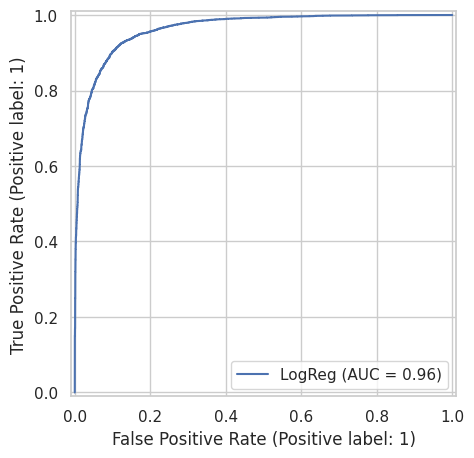

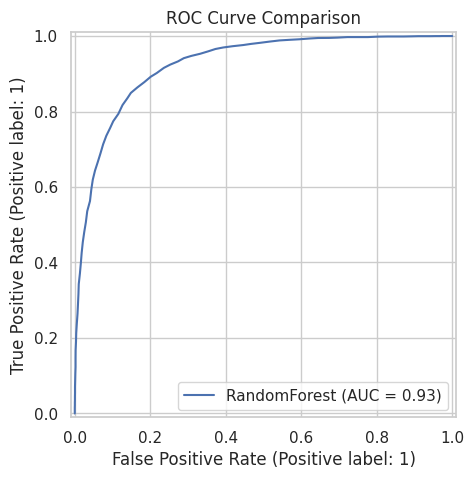

In [8]:
# Modeling
# 1. Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, RocCurveDisplay
)
# 2. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg.fit(X_train_tfidf, y_train)

y_pred_log = log_reg.predict(X_test_tfidf)
y_proba_log = log_reg.predict_proba(X_test_tfidf)[:, 1]

# Metrik evaluasi
print("=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1-score :", f1_score(y_test, y_pred_log))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_log))

# 3. Random Forest (model pembanding)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_tfidf, y_train)

y_pred_rf = rf.predict(X_test_tfidf)
y_proba_rf = rf.predict_proba(X_test_tfidf)[:, 1]

# Metrik evaluasi
print("=== Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_rf))

# 4. Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()

# 5. ROC Curve Comparison
RocCurveDisplay.from_predictions(y_test, y_proba_log, name="LogReg")
RocCurveDisplay.from_predictions(y_test, y_proba_rf, name="RandomForest")
plt.title("ROC Curve Comparison")
plt.show()

In [9]:
# Evaluation
# 1. Import Library
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# 2. Evaluasi Logistic Regression
metrics_log = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log),
    "Recall": recall_score(y_test, y_pred_log),
    "F1-score": f1_score(y_test, y_pred_log),
    "ROC-AUC": roc_auc_score(y_test, y_proba_log)
}

# 3. Evaluasi Random Forest
metrics_rf = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-score": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_proba_rf)
}

# 4. Tabel Perbandingan Hasil
df_results = pd.DataFrame([metrics_log, metrics_rf])
df_results

# 5. Analisis Singkat
best_model = df_results.sort_values(by="ROC-AUC", ascending=False).iloc[0]

print("Model terbaik berdasarkan ROC-AUC:")
print(best_model)

Model terbaik berdasarkan ROC-AUC:
Model        Logistic Regression
Accuracy                 0.90118
Precision               0.890561
Recall                  0.915612
F1-score                0.902913
ROC-AUC                 0.963691
Name: 0, dtype: object


In [10]:
# Summarization
# Install Library
!pip install replicate

# 1. Import libraries
import os
import replicate
from getpass import getpass
import pandas as pd
from tqdm import tqdm

# 2. Set up API Token Replicate
if "REPLICATE_API_TOKEN" not in os.environ:
    os.environ["REPLICATE_API_TOKEN"] = getpass("Masukkan Replicate API Token: ")

token = os.environ["REPLICATE_API_TOKEN"]
client = replicate.Client(api_token=token)

# 3. Tentukan model Granite dari Replicate
model = client.models.get("ibm-granite/granite-3.3-8b-instruct")  # model untuk summarization :contentReference[oaicite:1]{index=1}

# 4. Load beberapa review panjang saja sebagai contoh
df = pd.read_csv("Capstone-IMDB-Reviews-IBM-Granite/data/raw/IMDB Dataset.csv")
# Bisa ambil sample agar tidak terlalu besar
sample_reviews = df[df['sentiment']=="positive"]['review'].sample(5, random_state=42).tolist()

# 5. Fungsi untuk summarization
def summarize_text(text, max_length=100, min_length=30):
    output = replicate.run(
        "ibm-granite/granite-3.3-8b-instruct:a325a0cacfb0aa9226e6bad1abe5385f1073f4c7f8c36e52ed040e5409e6c034",
        input={
            "prompt": f"Summarize this review in {min_length}-{max_length} words:\n\n{text}"
        }
    )
    # Output biasanya berupa generator/list of strings → gabung jadi satu string
    return "".join(output)

# 6. Jalankan summarization untuk sample
summaries = []
for rev in tqdm(sample_reviews):
    try:
        s = summarize_text(rev, max_length=80, min_length=20)
    except Exception as e:
        print("Error pada review:", e)
        s = ""
    summaries.append(s)

# Buat dataframe untuk lihat hasil
df_sum = pd.DataFrame({"review": sample_reviews, "summary": summaries})
df_sum.head(10)

100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


,review,summary
0,I don't know how or why this film has a meager...,"This film, ""I am Curious: Yellow,"" is a master..."
1,For a long time it seemed like all the good Ca...,This Canadian sex farce pleasantly surprised t...
2,Terry Gilliam's and David Peoples' teamed up t...,"Terry Gilliam's ""Twelve Monkeys"" (1995), co-wr..."
3,What is there to say about an anti-establishme...,This review praises John Cassavetes' first ind...
4,This movie was made only 48 years after the en...,"This 1908 film, produced to mark the 50th anni..."
